# We then training the most commonly used 100 out of the 4803 characters

### Imports

In [3]:
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt

from matplotlib.font_manager import FontProperties
plt.rcParams['font.family'] = ['Heiti TC'] 
plt.rcParams['axes.unicode_minus'] = False  # in case minus sign is shown as box

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
from tensorflow.keras.optimizers import Adam

### Specify relevant raw, training, and testing data route

In [4]:
raw_data_path = '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_characters_cleaned'
training_data_path = '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data_100/'
testing_data_path = '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_testing_data_100/'

os.chdir(raw_data_path)

Current working directory: /Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_characters_cleaned


### 100 Most Common Characters in Chinese

In [11]:
selected_chars = ['的', '二', '是', '不', '了', '在', '人', '有', '我', '他', '這', '個', '們', '中', '來', '上', '大', '為', '和', 
                  '國', '地', '道', '以', '說', '時', '要', '就', '出', '會', '可', '也', '你', '對', '生', '能', '而', '子', '那', '得',
                 '於', '著', '下', '自', '之', '年', '過', '發', '後', '作', '里', '用', '到', '行', '所', '然', '家', '種', '事', '成', 
                '方', '多', '經', '去', '法', '學', '如', '都', '同', '現', '當', '沒', '動', '面', '起', '看', '定', '天', '分', '還', 
                  '進', '好', '小', '部', '其', '些', '主', '樣', '理', '心', '她', '本', '前', '開', '但', '因', '只', '從', '想', '實', '日'] 

In [6]:
len(set(selected_chars))

100

### We create our training directories from the raw dataset 

In [12]:
os.chdir(raw_data_path)
try: 
    os.mkdir(training_data_path) 

except:
    shutil.rmtree(training_data_path)
    os.mkdir(training_data_path) 

finally: 
    for char in selected_chars:
        shutil.copytree(raw_data_path+'/'+char, training_data_path+'/'+char )

In [13]:
os.getcwd()

'/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_characters_cleaned'

### Let's visualize a sample data

In [14]:
img_list = []
for char in selected_chars : 
    folder_path = training_data_path+'/'+char
    file_names = os.listdir(folder_path)
    for i in range(7):
        img_list.append(folder_path+'/'+file_names[i])

In [15]:
img_list[:3]

['/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data_100//的/的_49.png',
 '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data_100//的/的_48.png',
 '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data_100//的/的_9.png']

### Sample Data

2022-06-12 10:53:38.452314: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


{'二', '的', '是', '不'}


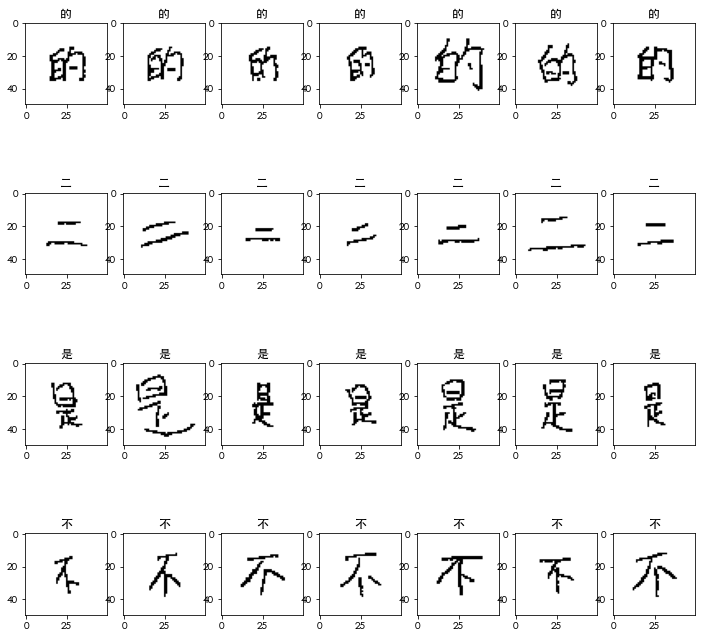

In [16]:
l = []
for i in range(28):      
    plt.subplot(4,7,i+1)
    title = img_list[i].split('/')[-1].split('_')[0]
    
    plt.gcf().set_size_inches((12,12)) 
    img = load_img(img_list[i])  
    img = tf.constant(np.array(img))
    plt.imshow(img)
    plt.title(title)
    l.append(title)
print(set(l))

----

### Data Augmentation

#### Training Set

In [17]:
train_data_gen = ImageDataGenerator(rescale = 1./255, 
                                    validation_split = 0.2,
                                    width_shift_range = 0.05,   
                                    height_shift_range = 0.05,
                                    zoom_range = 0.1)

In [18]:
train_gen = train_data_gen.flow_from_directory(training_data_path,
                                               target_size = (50,50),
                                               batch_size = 8,
                                               class_mode = 'categorical',
                                               subset = 'training'
                                              )

Found 4165 images belonging to 100 classes.


#### Testing Set

In [19]:
test_data_gen = ImageDataGenerator(rescale = 1./255, 
                                    validation_split = 0.2)

In [20]:
test_gen = test_data_gen.flow_from_directory(training_data_path,
                                             target_size = (50,50),
                                             batch_size = 8,
                                             class_mode = 'categorical',
                                             subset = 'validation')

Found 1013 images belonging to 100 classes.


In [21]:
test_gen[0][0].shape

(8, 50, 50, 3)

### Construct the CNN Sequential Model

In [30]:
model = Sequential() 
model.add(
    Conv2D(filters=5, 
           kernel_size=(2,2), 
           activation='relu', 
           padding='same',
           input_shape=(50,50,3),
          )
)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(
     Conv2D(filters=5, 
            kernel_size=(2,2), 
            activation='relu', 
            padding='same',
           )
)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(rate=0.5))

model.add(Dense(512, activation='relu'))

model.add(Dense(len(selected_chars), activation='softmax'))


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 5)         65        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 5)         105       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

### Compile the model

In [32]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

---

### Fit and train the model 
#### (Note: this is done with the same-named python script in this directory to avoid Jupyter kernel death)

In [ ]:
history = model.fit(train_gen, validation_data=test_gen, epochs=1000, verbose=1)

Epoch 1/1000
521/521 [==============================] - 4s 7ms/step - loss: 4.6405 - accuracy: 0.0125 - val_loss: 4.0696 - val_accuracy: 0.1155
Epoch 2/1000
521/521 [==============================] - 3s 7ms/step - loss: 3.7810 - accuracy: 0.1264 - val_loss: 2.8844 - val_accuracy: 0.2833
Epoch 3/1000
521/521 [==============================] - 3s 7ms/step - loss: 2.7758 - accuracy: 0.3050 - val_loss: 2.1829 - val_accuracy: 0.4590
Epoch 4/1000
521/521 [==============================] - 3s 7ms/step - loss: 2.2323 - accuracy: 0.4290 - val_loss: 2.0069 - val_accuracy: 0.4669
Epoch 5/1000
521/521 [==============================] - 3s 7ms/step - loss: 1.9913 - accuracy: 0.4658 - val_loss: 1.7980 - val_accuracy: 0.5341
Epoch 6/1000
521/521 [==============================] - 3s 7ms/step - loss: 1.8023 - accuracy: 0.5112 - val_loss: 1.8292 - val_accuracy: 0.5212
Epoch 7/1000
521/521 [==============================] - 3s 7ms/step - loss: 1.7031 - accuracy: 0.5251 - val_loss: 1.6304 - val_accuracy:

#### We see that the performance is around 76% accuracy on testing set, after 1000 epochs, which is not bad.

---

### Save the model

In [21]:
os.chdir(training_data_path)
model.save('CNN_model_100.h5')

### Save the history info to track accuracy and loss

In [22]:
import pickle

In [23]:
with open('./trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)